In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 6 類 為 frog


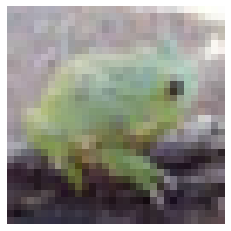

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import DenseNet121
cnn = DenseNet121(include_top=False, input_shape=(32, 32, 3))
cnn.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = Flatten()(cnn.output)
x = Dense(1024, activation="relu")(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_ResNet121.h5", save_best_only=True)]

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.001), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=40,
          validation_split=0.1, callbacks=callback)

Epoch 1/40
150/150 [==============================] - 7s 43ms/step - loss: 2.6542 - accuracy: 0.2801 - val_loss: 1.7577 - val_accuracy: 0.3606
Epoch 2/40
150/150 [==============================] - 5s 31ms/step - loss: 1.6012 - accuracy: 0.4286 - val_loss: 1.4330 - val_accuracy: 0.4918
Epoch 3/40
150/150 [==============================] - 4s 30ms/step - loss: 1.3956 - accuracy: 0.5075 - val_loss: 1.3816 - val_accuracy: 0.5110
Epoch 4/40
150/150 [==============================] - 4s 30ms/step - loss: 1.3004 - accuracy: 0.5410 - val_loss: 1.2891 - val_accuracy: 0.5438
Epoch 5/40
150/150 [==============================] - 4s 25ms/step - loss: 1.2438 - accuracy: 0.5618 - val_loss: 1.3160 - val_accuracy: 0.5378
Epoch 6/40
150/150 [==============================] - 4s 30ms/step - loss: 1.2009 - accuracy: 0.5747 - val_loss: 1.2555 - val_accuracy: 0.5558
Epoch 7/40
150/150 [==============================] - 4s 30ms/step - loss: 1.1497 - accuracy: 0.5954 - val_loss: 1.2394 - val_accuracy: 0.5642

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.2241 - accuracy: 0.5727


[1.2240997552871704, 0.572700023651123]

In [11]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[2.6169671e-02, 1.2421177e-01, 2.5872033e-02, ..., 6.0113654e-02,
        2.9490234e-02, 8.9881428e-02],
       [4.7291383e-02, 2.2308445e-01, 4.9875648e-04, ..., 1.6761474e-04,
        7.0799088e-01, 1.7166711e-02],
       [2.4477404e-01, 1.9688040e-02, 4.0007988e-03, ..., 2.3271101e-02,
        6.5642732e-01, 2.5505614e-02],
       ...,
       [1.0300185e-04, 2.4492116e-05, 2.4295945e-02, ..., 1.8494507e-02,
        6.9973817e-06, 4.8813462e-04],
       [1.7286821e-01, 7.6499328e-02, 3.9605725e-01, ..., 1.7381564e-02,
        7.9308674e-03, 1.5462602e-02],
       [2.9116403e-04, 1.4161479e-03, 4.4684359e-03, ..., 9.3446881e-01,
        1.0092074e-04, 2.8235174e-03]], dtype=float32)

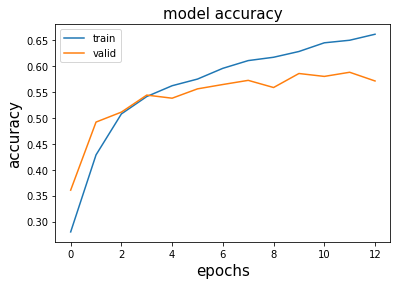

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

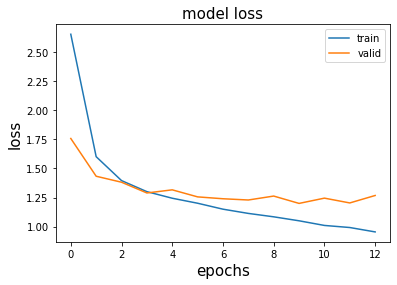

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 加了 Adam(learning_rate=0.0001)之後可以讓整體機率提升
#### val_accuracy =0.587